In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10, mnist
# For CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# For MNIST
# (x_train, y_train), (x_test, y_test) = mnist.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [2]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# For MNIST, reshape to (28, 28, 1) since it's grayscale
# x_train = x_train.reshape(-1, 28, 28, 1)
# x_test = x_test.reshape(-1, 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))  #(32, 32, 3) for CIFAR-10 or (28, 28, 1) for MNIST
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(x_train, y_train, epochs=20, batch_size=64,
                    validation_data=(x_test, y_test), verbose=1)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 101ms/step - accuracy: 0.2988 - loss: 1.8945 - val_accuracy: 0.5238 - val_loss: 1.3540
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 95ms/step - accuracy: 0.4946 - loss: 1.4057 - val_accuracy: 0.5942 - val_loss: 1.1704
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 89ms/step - accuracy: 0.5467 - loss: 1.2748 - val_accuracy: 0.6197 - val_loss: 1.0873
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 89ms/step - accuracy: 0.5702 - loss: 1.2092 - val_accuracy: 0.6411 - val_loss: 1.0380
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 88ms/step - accuracy: 0.5969 - loss: 1.1466 - val_accuracy: 0.6446 - val_loss: 1.0210
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 98s 109ms/step - accuracy: 0.6149 - loss: 1.0922 - val_accuracy: 0.6636 - val_loss: 0.9578
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 133s 98ms/step - accuracy: 0.6259 - loss: 1.0617 - val_accuracy: 0.6631 - val_loss: 0.9614
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 90ms/step - accuracy: 0.6370 - loss: 1.0336

In [6]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 - 3s - 11ms/step - accuracy: 0.7269 - loss: 0.7883
Test Accuracy: 0.7269


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen.fit(x_train)
model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=20,
          validation_data=(x_test, y_test), verbose=1)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 105s 133ms/step - accuracy: 0.4997 - loss: 1.4292 - val_accuracy: 0.6774 - val_loss: 0.9340
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 130ms/step - accuracy: 0.5317 - loss: 1.3386 - val_accuracy: 0.6195 - val_loss: 1.0924
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 127ms/step - accuracy: 0.5384 - loss: 1.3102 - val_accuracy: 0.6799 - val_loss: 0.9477
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 128ms/step - accuracy: 0.5467 - loss: 1.2866 - val_accuracy: 0.6889 - val_loss: 0.9058
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 102s 130ms/step - accuracy: 0.5527 - loss: 1.2775 - val_accuracy: 0.6791 - val_loss: 0.9578
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 128ms/step - accuracy: 0.5528 - loss: 1.2695 - val_accuracy: 0.6812 - val_loss: 0.9162
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 129ms/step - accuracy: 0.5614 - loss: 1.2539 - val_accuracy: 0.6961 - val_loss: 0.8978
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 105s 134ms/step - accuracy: 0.5662 - loss: 1.240

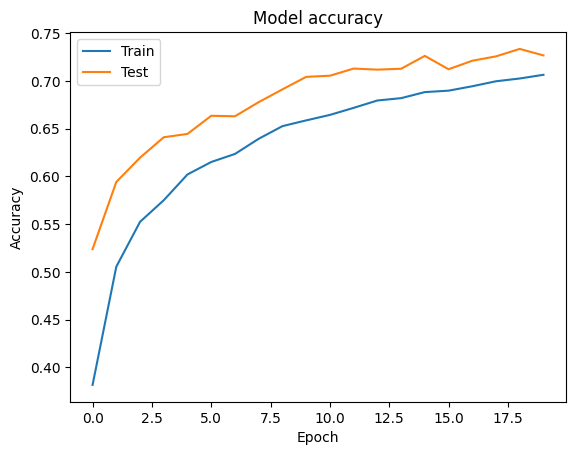

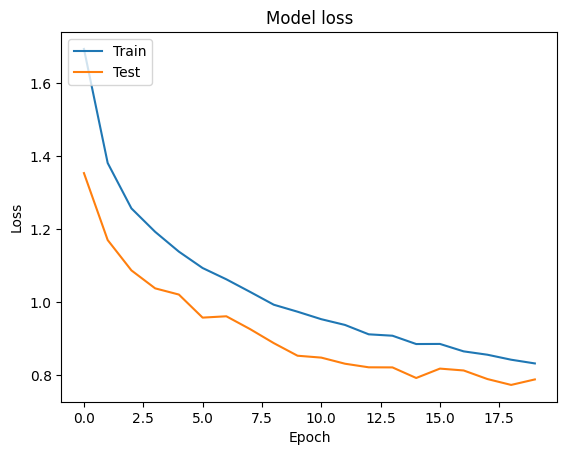

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()